In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas_datareader import data

In [2]:
aapl = data.DataReader("AAPL", 
                       start='2020-11-01', 
                       end='2021-02-21', 
                       data_source='yahoo')

In [3]:
aapl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-02,110.680000,107.320000,109.110001,108.769997,122866900.0,108.074883
2020-11-03,111.489998,108.730003,109.660004,110.440002,107624400.0,109.734207
2020-11-04,115.589996,112.349998,114.139999,114.949997,138235500.0,114.215385
2020-11-05,119.620003,116.870003,117.949997,119.029999,126387100.0,118.269310
2020-11-06,119.199997,116.129997,118.320000,118.690002,114457900.0,118.134956
...,...,...,...,...,...,...
2021-02-12,135.529999,133.690002,134.350006,135.369995,60145100.0,134.938263
2021-02-16,136.009995,132.789993,135.490005,133.190002,80576300.0,132.765244
2021-02-17,132.220001,129.470001,131.250000,130.839996,97918500.0,130.422729


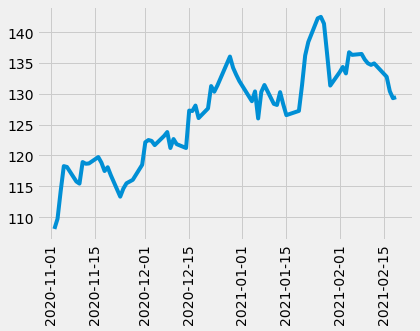

In [4]:
plt.xticks(rotation='vertical')
plt.plot(aapl['Adj Close'])

In [5]:
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = aapl['Adj Close'].rolling(window=30).mean()
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = aapl['Adj Close'].rolling(window=100).mean()
SMA5 = pd.DataFrame()
SMA5['Adj Close'] = aapl['Adj Close'].rolling(window=5).mean()
SMA10 = pd.DataFrame()
SMA10['Adj Close'] = aapl['Adj Close'].rolling(window=10).mean()

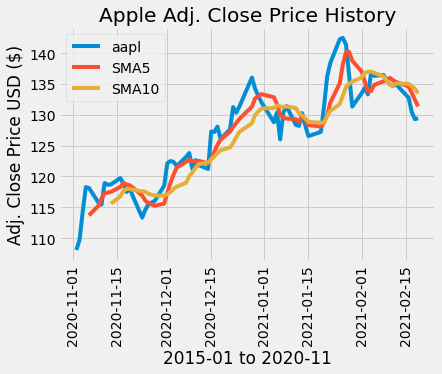

In [6]:
plt.plot(aapl['Adj Close'], label = 'aapl')
plt.plot(SMA5['Adj Close'], label = 'SMA5')
plt.plot(SMA10['Adj Close'], label = 'SMA10')
plt.title('Apple Adj. Close Price History')
plt.xlabel('2015-01 to 2020-11')
plt.ylabel('Adj. Close Price USD ($)')
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.show()

In [15]:
data = pd.DataFrame()
data['AAPL'] = aapl['Adj Close']
data['SMA5'] = SMA5['Adj Close']
data['SMA10'] = SMA10['Adj Close']

In [16]:
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = 1

    for i in range(len(data)):
        if data['SMA5'][i] > data['SMA10'][i]:
            if flag != 1:
                sigPriceBuy.append(data['AAPL'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA5'][i] < data['SMA10'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['AAPL'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    
    return (sigPriceBuy,sigPriceSell)

In [17]:
buy_sell_sma = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell_sma[0]
data['Sell_Signal_Price'] = buy_sell_sma[1]

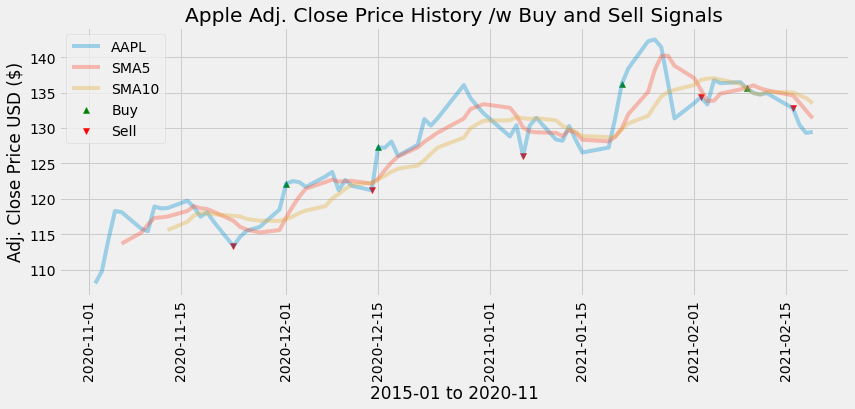

In [18]:
plt.figure(figsize=(12.6,4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA5'], label = 'SMA5', alpha = 0.35)
plt.plot(data['SMA10'], label = 'SMA10', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adj. Close Price History /w Buy and Sell Signals')
plt.xlabel('2015-01 to 2020-11')
plt.ylabel('Adj. Close Price USD ($)')
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.show()